In [93]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [94]:
iris_df = pd.read_csv('Iris.csv')

# Drop the "Id" column as it's not useful for analysis
iris_df = iris_df.drop('Id', axis=1)

# Renaming the columns
iris_df = iris_df.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
})

# Convert the "species" column to categorical data
iris_df['species'] = pd.Categorical(iris_df['species'])

print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [95]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [96]:
# Check for null values
print(iris_df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [97]:
# group values based on means
df_bar = iris_df.groupby(['species']).mean().reset_index()
df_bar.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


### **Data Visualization**

Average Sepal Lengths:
species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64
*********************************************************
Correlation between Sepal Length and Petal Length:
0.8717541573048718
*********************************************************


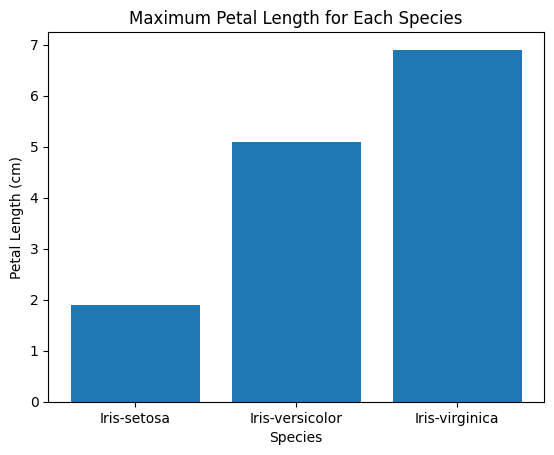

In [98]:
import matplotlib.pyplot as plt

# Compute the average sepal length for each species
avg_sepal_length = iris_df.groupby('species')['sepal_length'].mean()
print("Average Sepal Lengths:")
print(avg_sepal_length)
print("*********************************************************")

# Compute the correlation between sepal length and petal length
correlation = iris_df['sepal_length'].corr(iris_df['petal_length'])
print("Correlation between Sepal Length and Petal Length:")
print(correlation)

print("*********************************************************")
# Plot the petal length for each species
petal_lengths = iris_df.groupby('species')['petal_length'].max()
plt.bar(petal_lengths.index, petal_lengths.values)
plt.title('Maximum Petal Length for Each Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

In [99]:
fig1 = px.histogram(iris_df, x="species", color="species")
fig1.show()

In [100]:
# Scatter plot
fig2 = px.scatter(iris_df, x='sepal_length', y='sepal_width', color='species')
fig2.show()

In [101]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [102]:
# Histogram
fig3 = px.histogram(iris_df, x='petal_length', color='species', marginal='rug')
fig3.show()

In [103]:
fig4 = px.scatter(iris_df, x='sepal_length' , y='sepal_width', color="species")
fig4.show()

In [104]:
# Line Plot
fig5 = px.line(iris_df, x='sepal_length' , y='sepal_width', color="species")
fig5.show()

In [105]:
# Line Plot
# let us sort the data first
df_line = iris_df.sort_values(by=['sepal_length'])

fig6 = px.line(df_line, x='sepal_length' , y='sepal_width', color="species")
fig6.show()

#### **Scatter 3D Plot**

In [106]:
fig7 = px.scatter_3d(iris_df, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig7.show()

In [107]:
# Pie Chart
# first we have to check the dataset
iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [108]:
# piechart
df_pie = iris_df['species'].value_counts().reset_index()
df_pie.columns = ['species', 'count']
fig8 = px.pie(df_pie, values='count', names='species')
fig8.show()

In [109]:
# Area Chart
df_area = iris_df.sort_values(by=['sepal_length'])
fig9 = px.area(df_area, x='sepal_width', y='sepal_length', color='species')
fig9.show()

In [110]:
# Violon Plot
fig10 = px.violin(iris_df, x='species' , y='sepal_width', color = 'species', box=True)
fig10.show()

In [111]:
# Sunburst Chart
df_sunburst = iris_df.groupby(['species', 'petal_width']).size().reset_index(name='counts')

fig11 = px.sunburst(df_sunburst, path=['species', 'petal_width'], values='counts')
fig11.show()

In [112]:
fig = px.imshow(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr())
fig.show()

#### **ML Part (Using Linear Regression)**

In [113]:
# splitting the dataset into X and y (features and lables)
X = iris_df[['sepal_length', 'sepal_width']]
y = iris_df['petal_width']

# Splitting the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=5)

# Training the model on the training set
model = LinearRegression() # calling the model
model.fit(X_train, y_train) #fitting or training the model (Fitting a regression line)

# predicting the values of testing dataset
y_pred = model.predict(X_test)

# Print the slope and intercept of the regression line
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Intercept: -1.610371547155725
Slope: [ 0.73666558 -0.49013985]


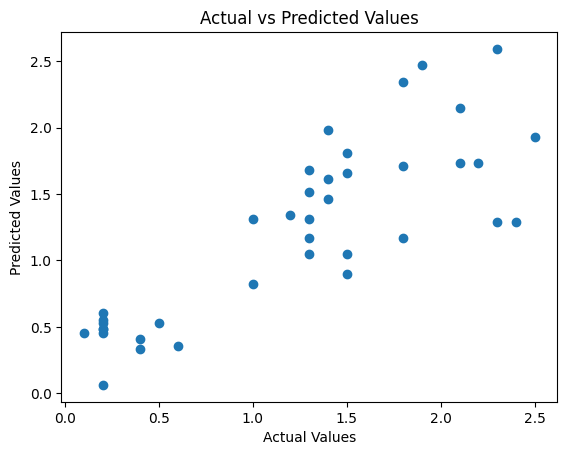

In [114]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [115]:
# Printing the metrics for evaluating the model
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

R2 Score:  0.6917768819901775
Mean Absolute Error:  0.32745923542408345
Mean Squared Error:  0.167646481382337


#### **ML Part (Using KNN)**

In [116]:
# Separating the features and target variable
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [120]:
# KNN Model Evaluation or its performance
y_pred = knn.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred)* 100)

Accuracy score: 100.0


#### **ML Part (using random forest classifer)**

In [121]:
# Split the dataset into features (X) and target variable (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculating our accuracy
RCaccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", RCaccuracy)

Accuracy: 1.0


In [122]:
accuracy_percentage = RCaccuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 100.00%
